In [1]:
from smach_utils2 import *

[ WARN] [1696702551.397630016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2151.126000 according to authority /pose_integrator


In [2]:
tfBuffer = tf2.Buffer()

listener = tf2.TransformListener(tfBuffer)
b_tf=tf2.TransformBroadcaster()
b_st=tf2.StaticTransformBroadcaster()


In [3]:
def write_tf(pose, q, child_frame , parent_frame='map',time=0):
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
def read_tf(t):
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [4]:
res=segmentation_server.call()

[ WARN] [1696633609.903412275]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.903505208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.903549649]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.903597859]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.903648560]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.903690709]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2613.851000 according to authority /pose_integrator
[ WARN] [1696633609.90

In [ ]:
res

In [ ]:
poses=np.asarray(res.poses.data)

poses=poses.reshape((int(len(poses)/3) ,3     )      )

In [ ]:
head.set_named_target('neutral')

In [ ]:
#t=write_tf(res.poses.data,(0,0,0,1),'Target',"head_rgbd_sensor_depth_frame",0)
t=write_tf(poses[0,:],(0,0,0,1),'Target_tmp',"head_rgbd_sensor_depth_frame",0) ## CHOOSE A TARGET 

b_tf.sendTransform(t)
rospy.sleep(0.2)
tt=tfBuffer.lookup_transform('map','Target_tmp',rospy.Time(0))
rospy.sleep(0.2)
tt
pose,quat= read_tf(tt)
t=write_tf(pose,(0,0,0,1),'Target')
b_st.sendTransform(t)


In [ ]:
head = moveit_commander.MoveGroupCommander('head')
#gripper =  moveit_commander.MoveGroupCommander('gripper')
#arm=moveit_commander.MoveGroupCommander('arm')

In [ ]:
#whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
clear_octo_client()
arm_grasp_from_above = [0.3, -2.0, 0.0, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:
head.set_named_target('neutral')
head.go()
clear_octo_client()


In [ ]:
#
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]#
wb_gp.pose.position.z= pose[2]+0.3   ##Pre Grasp from above


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
if plan[0]:
    succ=whole_body.go()
else:
    print('No plan')

In [ ]:
succ

In [ ]:
t=tfBuffer.lookup_transform('hand_palm_link', 'Target',rospy.Time())

In [ ]:
pose,_=read_tf(t)
pose

In [ ]:
goal_p=whole_body.get_current_pose()
goal_p.pose.position.x=0.1
goal_p.pose.position.y=pose[1]
goal_p.pose.position.z=pose[2]+0.2
#goal_p.pose.orientation.w=quat[0]
#goal_p.pose.orientation.x=quat[1]
#goal_p.pose.orientation.y=quat[2]
#goal_p.pose.orientation.z=quat[3]



In [ ]:
whole_body.set_pose_target(goal_p)

In [ ]:
whole_body.plan()

In [ ]:
goal_p=whole_body.get_current_pose()

In [ ]:
whole_body.set_pose_target(goal_p)
whole_body.plan()

In [ ]:
whole_body.go()

In [ ]:
res.poses.data

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time())

In [ ]:
pose,quat=read_tf(t)

In [ ]:
goal_pose= Pose()

In [ ]:
goal_pose.position.x=pose[0]
goal_pose.position.y=pose[1]
goal_pose.position.z=pose[2]

In [ ]:
pose,goal_pose

In [ ]:
whole_body.get_current_pose()

In [ ]:
wb=whole_body.get_current_joint_values()

In [ ]:
wb[4]=0.1

In [ ]:
whole_body.go(wb)

In [ ]:
pose=whole_body.get_current_pose()

In [ ]:
type(pose.pose.orientation)

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
gp=whole_body.get_current_pose()

In [ ]:

gp.pose.orientation
pose=gp
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])

In [ ]:
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tfBuffer.lookup_transform('hand_palm_link','New:static_Target',rospy.Time(0))

In [ ]:
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)

In [ ]:
wb_gp=whole_body.get_current_pose()

In [ ]:
eu=tf.transformations.euler_from_quaternion((wb_gp.pose.orientation.w,wb_gp.pose.orientation.x,wb_gp.pose.orientation.y,wb_gp.pose.orientation.z))
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)
rotated=tf.transformations.quaternion_multiply(quat,rot_quat)



In [ ]:
wb_gp.pose.position.x-=0.1
wb_gp.pose.position.y+=0.1
wb_gp.pose.position.z-=0.1


In [ ]:
wb_gp.pose.orientation.w=rotated[0]
wb_gp.pose.orientation.x=rotated[1]
wb_gp.pose.orientation.y=rotated[2]
wb_gp.pose.orientation.z=rotated[3]

In [ ]:
whole_body.set_pose_target(wb_gp)

In [ ]:

plan=whole_body.plan()
plan

In [ ]:
if plan[0]:
    whole_body.go()

In [ ]:
whole_body.go()

In [ ]:
arm_grasp_from_above = [0.19263830140116414, -2.2668981568652917, -0.007358947463759424, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:

t=tfBuffer.lookup_transform('New:static_Target','hand_palm_link',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat
np.save('above_quat.npy',quat)

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
plan

In [ ]:

whole_body.go()

In [ ]:
wb_v=whole_body.get_current_joint_values()


In [ ]:
gripper = GRIPPER()

In [ ]:
gripper.close()

In [ ]:
gripper =  moveit_commander.MoveGroupCommander('gripper')

In [ ]:

|
tf_man.pub_static_tf()

In [ ]:
head.set_joint_values([0.0, -0.77])


In [ ]:
print ('rdy')

In [ ]:
brazo.set_named_target('go')
head.set_joint_values([0.0, -0.77])
res=segmentation_server.call()
if len(res.poses.data)==0: print( 'failed')
else:

    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  





    tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
    rospy.sleep(0.3)
    pose, _ =tf_man.getTF('target')
    tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


    head.set_named_target('neutral')

In [ ]:
poses=np.asarray(res.poses.data)
poses=poses.reshape((int(len(poses)/3) ,3     )      )  





tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO

In [ ]:
tf_man.change_ref_frame_tf(point_name='target', new_frame='map')


In [ ]:
pose, _ =tf_man.getTF('target')
tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


In [ ]:
head.set_named_target('neutral')

In [ ]:
 clear_octo_client()
#############################10 * 2 *np.pi / 360 ####pi /2
arm_grasp_from_above = [0.2, -1.57, -0.13 , -1.57, 0.0, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)   

In [ ]:
clear_octo_client()
pose, quat=tf_man.getTF('Target')

wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2

whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()

In [ ]:
pos,rot=tf_man.getTF(target_frame=,ref)
pos

In [ ]:
from smach_utils2 import *

In [ ]:
from smach_utils2 import *


In [ ]:
wb_gp=whole_body.get_current_pose()            
wb_gp.header.frame_id="Target"
wb_gp.pose.position.x=0.02669
wb_gp.pose.position.y=0.045
wb_gp.pose.position.z= 0.033
wb_gp.pose.orientation.w=-0.990
wb_gp.pose.orientation.x= 0.0246
wb_gp.pose.orientation.y= -0.0085
wb_gp.pose.orientation.z= 0.1345



In [ ]:
aaa

In [ ]:
from smach_ros import ActionServerWrapper

In [ ]:
res = speech_recog_server()

In [ ]:
res.data

#msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg

In [ ]:
if len(res.data.split(' '))>1:print(res.data.split(' ')[-1])    ### Number of words


In [ ]:
from ros_whisper_vosk.srv import SetGrammarVosk
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar(['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi'])  ##PRESET NAMES

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
msg

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg.data
if len(msg.data.split(' '))>1:print(msg.data.split(' ')[-1]) 

In [ ]:

res=get_keywords_speech(10)
res

In [ ]:
drinks=['coke','juice','beer', 'water', 'soda', 'wine']
names=['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
confirmation=['yes','no']
gram=drinks+names+confirmation

set_grammar(gram)  ##PRESET DRINKS


In [ ]:
res2 = get_keywords_speech(10)
if res2 in['yes','jack','juice']:print('chido',res2)
else: print ('chale',res2)

In [ ]:
set_grammar(['yes','no'])

In [ ]:
res2 in ['yes', 'no']

In [ ]:
res2='not'

In [32]:
import matplotlib.pyplot as plt

#map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)

In [33]:
map_msg.info.width

512

In [44]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))



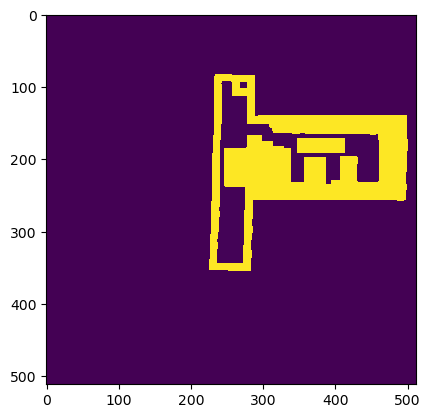

In [45]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [46]:
img_map[237,474]

100

In [ ]:
from smach_utils2 import *


In [47]:
brazo.set_named_target()
head.set_joint_values([0,-1])


In [58]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

object found
1
Occupancy map at point object 0-> pixels  241 473 100
reject point, most likely part of arena, occupied inflated map
object found at robot coords.[10.845846994351607, -0.746051630408785, 0.06784710732571553] 
0
shutdown request: [/smach] Reason: new node registered with same name


In [53]:
contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),contoured)

In [49]:
pose

array([-0.48032123, -0.42369834,  1.43808556])

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]


In [ ]:
#FREE SPACE . SO IT IS A PLAUSIBLE HYPOTHESIS OF A TRASH OBJECT

In [ ]:
pose

In [1]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

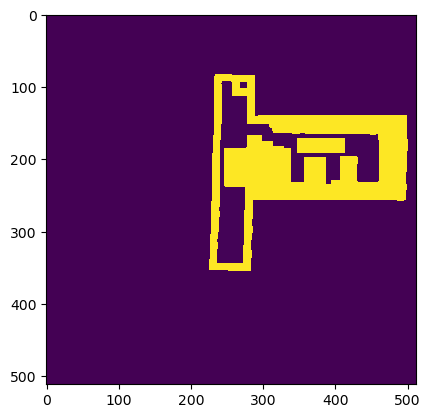

In [21]:

import matplotlib.pyplot as plt
plt.imshow(img_map)

In [41]:
origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) 

(247, 266)

In [31]:
img_map[200,474]

100

In [26]:
img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]


#img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]

0

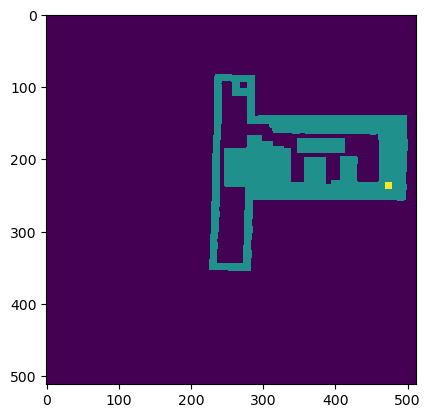

In [27]:
origin_map_img=[round(contoured.shape[0]*0.5) ,round(contoured.shape[1]*0.5)]
pose,_= tf_man.getTF('object_0')

contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),img_map)
plt.imshow(contoured)

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]#### Yes axes seem to be "flipped"

In [ ]:

contoured[origin_map_img[1],origin_map_img[0]]

In [ ]:
robot=get_robot_px()
draw_at(origin_map_img[0]+robot[0]+round(pose[0]/pix_per_m) ,origin_map_img[1] -robot[1] - round(pose[1]/pix_per_m),contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')

In [ ]:
contoured[origin_map_img[1]- round(pose[1]/pix_per_m),origin_map_img[0]- round(pose[0]/pix_per_m)]

In [ ]:
contoured[0,0]

In [ ]:
contoured[origin_map_img[0]- round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m)]

In [ ]:
c=point_to_px(pose[0],pose[1])
robot=get_robot_px()
draw_at(1024+robot[1]+c[0],1024+robot[0]+c[1],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')


In [ ]:
contoured[c[0]+1024,c[1]+1024]

In [ ]:

check_point_map(pose[0],pose[1])

In [8]:
import matplotlib.pyplot as plt

def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [15]:
broadcaster = tf2_ros.TransformBroadcaster()
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)    
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
#############################################
#points_data = ros_numpy.numpify(points_msg)    
#image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
#image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
#image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
#rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
##
_,corrected=correct_points(points_msg)  ### aplica la transformada de la camara para corregir la perspectiva
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)   
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
print (bin_edges,histogram[:-1].argmax(), histogram[:-1].argmax())
plane_height= (trans)+bin_edges[histogram[:-1].argmax()]
print(plane_height, 'plane_height')
################################

NameError: name 'correct_points' is not defined

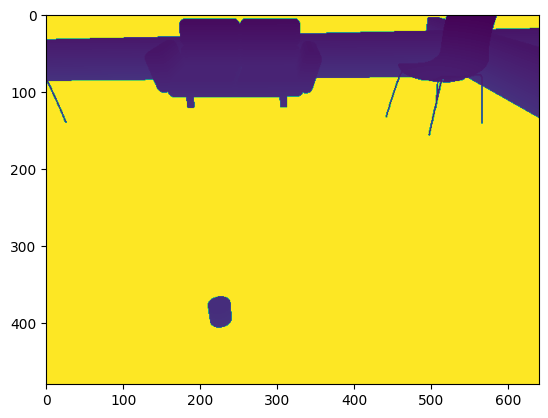

In [24]:
np_data=ros_numpy.numpify(points_msg)

try:
    trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())

    trans,rot=read_tf(trans)
    #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    print ( 'No head TF FOUND')
eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
t=TransformStamped()
rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
#rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
t.header.stamp = points_msg.header.stamp
t.transform.rotation.x = rot[0]
t.transform.rotation.y = rot[1]
t.transform.rotation.z = rot[2]
t.transform.rotation.w = rot[3]
cloud_out = do_transform_cloud(points_msg, t)
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(np_data.shape)
img= np.copy(-corrected['z'])
img[np.isnan(img)]=2
img_corrected = np.where((img<trans[2]*0.96) ,img,5)
plt.imshow(img_corrected)

In [13]:
brazo.set_named_target('go')

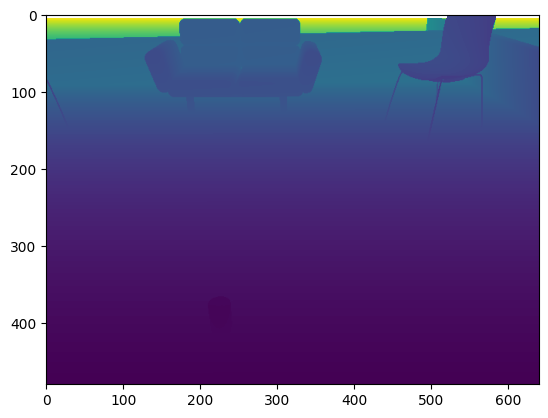

In [17]:
plt.imshow(np_data['z'])

In [18]:
 contours, hierarchy = cv2.findContours(img_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=0
cents=[]
points=[]
points_c=[]
images=[]
for i, contour in enumerate(contours):
    
    area = cv2.contourArea(contour)
    if area<100 or area >10000:pass
    else:
        
        M = cv2.moments(contour)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print (cv2.contourArea(contour))
        boundRect = cv2.boundingRect(contour)
        image_aux= image[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        images.append(image_aux)
        image_aux= img_corrected[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        mask=np.where(image_aux!=5)
        npmask=np.asarray(mask).T
        
        rgb_image=cv2.rectangle(rgb_image,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (255,255,0), 2)
        iim=cv2.drawContours(rgb_image, contour, -1, (0,255,0), 10)
        

1113.5
999.0
9735.0


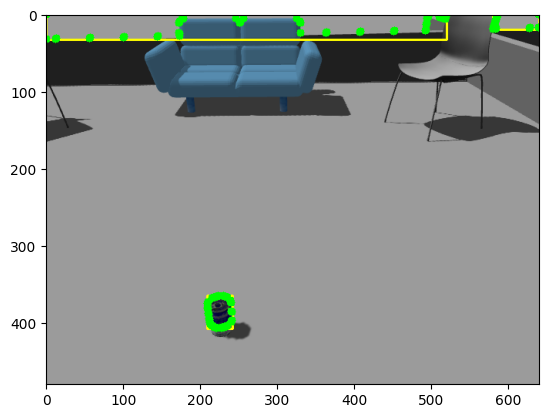

[ WARN] [1696703642.595812593]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator
[ WARN] [1696703642.595870970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator
[ WARN] [1696703642.595898274]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator
[ WARN] [1696703642.595923624]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator
[ WARN] [1696703642.595949247]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator
[ WARN] [1696703642.595975948]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2678.298000 according to authority /pose_integrator


shutdown request: [/smach] Reason: new node registered with same name


In [22]:
plt.imshow(iim)

In [19]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        print(ix)
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((np_data['x'][boundRect[1]+ix,boundRect[0]+iy],np_data['y'][boundRect[1]+ix,boundRect[0]+iy],np_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            #print (xyz)
            xyz.append(aux)


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
3

In [20]:
i=0
x,y,z=np.asarray(xyz).mean(axis=0)
if np.isnan(x) or np.isnan(y) or np.isnan(z):
    print('nan')
else:
    t=write_tf(    (x,y,z), (0,0,0,1), 'Object'+str(i), "head_rgbd_sensor_rgb_frame"   )  
broadcaster.sendTransform(t)

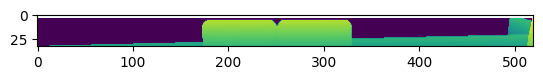

In [21]:
plt.imshow(corrected['z'][boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]])

In [107]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((corrected['x'][boundRect[1]+ix,boundRect[0]+iy],corrected['y'][boundRect[1]+ix,boundRect[0]+iy],corrected['z'][boundRect[1]+ix,boundRect[0]+iy])))
        print (aux)
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            xyz.append(aux)

[ WARN] [1696637231.780508415]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.780576338]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.780618797]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.780659711]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.780704232]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.780754713]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4047.610000 according to authority /pose_integrator
[ WARN] [1696637231.78

In [203]:
np.asarray(xyz).mean(axis=0)

array([ 1.3763139 , -0.1832159 , -0.91891915], dtype=float32)

[ WARN] [1696640049.651556979]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.651614114]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.651647984]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.651677269]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.651709016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.651738999]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5168.719000 according to authority /pose_integrator
[ WARN] [1696640049.65

[ WARN] [1696640081.563506221]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.563553751]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.563583642]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.563611823]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.563638767]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.563666009]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5181.781000 according to authority /pose_integrator
[ WARN] [1696640081.56

[ WARN] [1696640138.511402089]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.511463563]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.511498065]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.511525534]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.511553150]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.511589627]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5204.057000 according to authority /pose_integrator
[ WARN] [1696640138.51

[ WARN] [1696640147.253034311]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.253099196]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.253157964]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.253209160]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.253249831]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.253288688]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5207.710000 according to authority /pose_integrator
[ WARN] [1696640147.25

[ WARN] [1696640174.886676102]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.886729828]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.886767935]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.886805070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.886846638]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.886884528]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5218.892000 according to authority /pose_integrator
[ WARN] [1696640174.88

[ WARN] [1696640187.745919227]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.745987620]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.746029486]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.746082023]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.746122503]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.746154460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 5224.075000 according to authority /pose_integrator
[ WARN] [1696640187.74

In [4]:
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    

In [51]:
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
plane_height= (trans)+bin_edges[histogram[:-1].argmax()+1]
print(plane_height, 'plane_height')


2.2241341384792435 plane_height


In [52]:
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z


# Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
img_corrected = np.where((zs_no_nans >-trans-0.03),zs_no_nans,1)

[ WARN] [1696635269.160388902]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.160436570]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.160468621]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.160496922]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.160522412]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.160550643]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3269.377000 according to authority /pose_integrator
[ WARN] [1696635269.16

In [58]:
corrected['z'][200,200]

1.8288597

[ WARN] [1696635359.833001161]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.833068644]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.833114187]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.833155731]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.833196514]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.833246846]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3305.096000 according to authority /pose_integrator
[ WARN] [1696635359.83

In [60]:
img_corrected

array([[0.49852258, 0.4999064 , 0.5012977 , ..., 0.8072833 , 0.807192  ,
        0.8071008 ],
       [0.5062822 , 0.50768715, 0.5091    , ..., 0.82063687, 0.82054406,
        0.8204511 ],
       [0.5140389 , 0.51546514, 0.51689935, ..., 0.8340109 , 0.8339164 ,
        0.83382213],
       ...,
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]], dtype=float32)

[ WARN] [1696635399.106977105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.107026113]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.107055151]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.107082815]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.107116190]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.107144910]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3320.713000 according to authority /pose_integrator
[ WARN] [1696635399.10

In [27]:
plane_height

0.019896161296987014

[ WARN] [1696634577.941727390]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.941795086]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.941851558]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.941914956]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.941975260]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.942029875]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2995.569000 according to authority /pose_integrator
[ WARN] [1696634577.94

[ WARN] [1696634640.247978643]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.248040868]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.248081949]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.248123318]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.248155332]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.248196496]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3020.346000 according to authority /pose_integrator
[ WARN] [1696634640.24

[ WARN] [1696639269.139723334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.139780125]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.139819357]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.139856842]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.139894036]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.139931170]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4856.997000 according to authority /pose_integrator
[ WARN] [1696639269.13

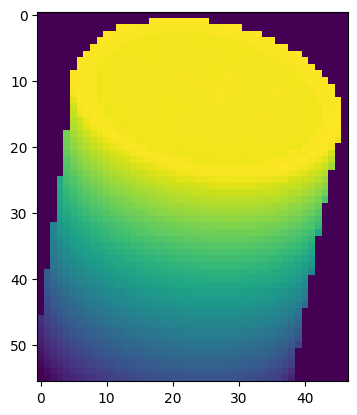

[ WARN] [1696639274.234797776]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.234857276]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.234894410]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.234929614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.234963542]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.234997607]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4858.978000 according to authority /pose_integrator
[ WARN] [1696639274.23

[ WARN] [1696639296.689492789]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.689535315]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.689565569]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.689593269]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.689620885]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.689648273]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4867.824000 according to authority /pose_integrator
[ WARN] [1696639296.68

In [33]:
for i, contour in enumerate(contours):
    boundRect = cv2.boundingRect(contour)

[ WARN] [1696634831.641513615]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.641579652]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.641628034]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.641679801]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.641724584]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.641763058]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3096.909000 according to authority /pose_integrator
[ WARN] [1696634831.64

In [39]:
img_corrected

array([[0.49847034, 0.49985403, 0.5012452 , ..., 0.8071987 , 0.80710745,
        0.80701625],
       [0.50623   , 0.5076348 , 0.5090475 , ..., 0.8205523 , 0.82045954,
        0.82036656],
       [0.51398677, 0.5154129 , 0.51684695, ..., 0.8339263 , 0.83383185,
        0.83373755],
       ...,
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]], dtype=float32)

[ WARN] [1696634950.055867373]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.055916798]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.055945041]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.055971142]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.055996097]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.056021410]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3144.289000 according to authority /pose_integrator
[ WARN] [1696634950.05

[ WARN] [1696634978.847066439]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.847135986]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.847188674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.847236905]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.847287451]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.847328915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3155.237000 according to authority /pose_integrator
[ WARN] [1696634978.84

In [43]:
import matplotlib.pyplot as plt

contours, hierarchy = cv2.findContours(im_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

[ WARN] [1696635075.160434110]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.160510616]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.160567131]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.160645426]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.160703857]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.160754898]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3192.567000 according to authority /pose_integrator
[ WARN] [1696635075.16

In [23]:
def segment_floor(points_data,zs_no_nans,obj_hMax=0.85,obj_lMax=1.5,thres_floor=0.03):
    # obj_hMax -> altura maxima para objetos para segmentar
    # obj_lMax -> distancia de objetos maxima para segmentar

    # Quita piso y mayor a una cierta altura
    t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
    trans=t.transform.translation.z
    
    # Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
    img_corrected = np.where((zs_no_nans >-trans-thres_floor),zs_no_nans,1)
    # Quito objetos mayores a una altura -> obj_hMax
    img_corrected = np.where((img_corrected < -obj_hMax),img_corrected,1)
    

    # Quita objetos lejanos
    ls_no_nans=np.where(~np.isnan(points_data['z']),points_data['z'],5)
    
    lZ_no_nans=np.where(ls_no_nans<obj_lMax,ls_no_nans,5)
    
    # Con esto, quita en z los que en X (alturas) esten con 5
    for r in range(img_corrected.shape[0]):
        for c in range(img_corrected.shape[1]):
            if lZ_no_nans[r,c]>=5:
                img_corrected[r,c]=1
    
    return img_corrected


[ WARN] [1696634501.991438745]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.991500756]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.991534677]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.991567334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.991597073]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.991627359]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2965.515000 according to authority /pose_integrator
[ WARN] [1696634501.99

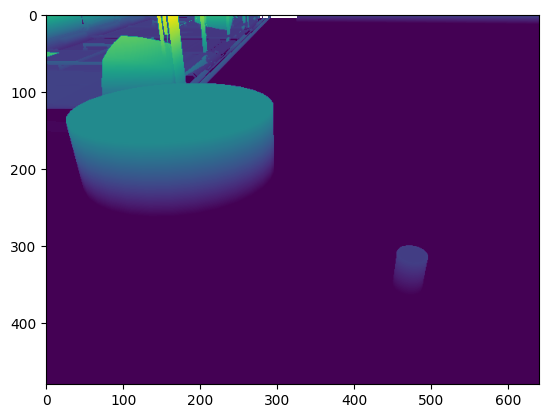

In [41]:
plt.imshow(corrected['z'])

In [42]:
corrected['z'][200,200]

-0.76264405

[ WARN] [1696635032.784975241]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.785035394]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.785072187]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.785121467]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.785164370]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.785206593]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3175.934000 according to authority /pose_integrator
[ WARN] [1696635032.78

[ WARN] [1696635070.229373545]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.229423421]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.229464412]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.229507427]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.229553452]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.229598889]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3190.770000 according to authority /pose_integrator
[ WARN] [1696635070.22

In [26]:
head.set_joint_values([0,-0.7])